In [1]:
# Use for testing

import pandas as pd
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [24]:
#Import country names, codes and regions
df = pd.read_csv('../data/cntry_database.csv', sep=';')
df = df.rename(columns={'continent' : 'cntry_region','name':'cntry_name','code':'cntry_code'})

#Cleaning the countries dataframe, exclusing the antarctic regions
cntry_df = df[df['cntry_region']!='Antarctica North']
cntry_df = cntry_df.sort_values('cntry_name')
cntry_df['cntry_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire-Sint Eustatiusand Saba', 'Bosniaand Herzegovina',
       'Botswana', 'Brazil', 'BritishIndian Ocean Territory',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Cocos Keeling )Islands', 'Colombia',
       'Comoros', 'Congo', 'Congo(the Democratic Republic)',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czech Republic', 'Côted Ivoire', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'ElSa

In [ ]:
def renw_clean():
    #Inputing the data
    df = pd.read_csv('../data/renewable_energy.csv')
    #df = pd.read_csv('./data/renewable_energy.csv') #For ploting here the charts use this !!! 

    #First Formating and Cleanup
    df = df.rename(str.lower, axis='columns')
    df = df.rename(columns={'flag codes' : 'flag_codes'})
    df = df.fillna(0)

    df['time'] = pd.to_datetime(df['time'], format="%Y")
    df['year'] = df['time'].dt.year
    
    #Deleting the other type of measure
    df = df[df['measure']=='KTOE']

    #Deleting the L values rows
    dfl = df[df['flag_codes']!='L'] 
    dfl = dfl.drop(columns=['flag_codes'])

    #Loading the countries file
    df_countries = pd.read_csv('../data/cntry_database.csv', sep=';')
    df_countries = df_countries.rename(columns={'continent' : 'cntry_region','name':'cntry_name','code':'cntry_code'})

    #Cleaning the countries dataframe, exclusing the antarctic regions
    df_countries = df_countries[df_countries['cntry_region']!='Antarctica North']

    #Merging the DF to have the countries names on my DF
    merged_df = pd.merge(dfl, df_countries, left_on='location', right_on='cntry_code', how='left')

    #Cleaning the general values such as World; G20 and European Union
    codes_drop = ['WLD','EU28','OECD','G20','OEU']
    merged_df = merged_df[~merged_df['location'].isin(codes_drop)]

    #Reorganizing the dataframe
    merged_df = merged_df[['time','year','cntry_code','cntry_name','cntry_region','measure','subject','value']]

    #Categorizing the location by continent
    reg_cont = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
    reg_type = CategoricalDtype(categories=reg_cont, ordered=False)
    merged_df['cntry_region'] = merged_df['cntry_region'].astype(reg_type)
    return merged_df


In [ ]:
def gdp_clean():
    
    df = pd.read_csv('..\data\gdp_data.csv')
    #df = pd.read_csv('.\data\gdp_data.csv') #For ploting here the charts use this !!!
    
    #Sort the data and combine the time series of both df
    df = df.sort_values('year')
    df = df[df['year'] <= 2015]
    df = df[['country_code','year','value']]

    #input the country database for the codes, names and locations
    df_countries = pd.read_csv('../data/cntry_database.csv', sep=';') 
    #df_countries = pd.read_csv('../data/cntry_database.csv', sep=';') #For ploting here the charts use this !!!
    
    df_countries = df_countries.rename(columns={'continent' : 'cntry_region','name':'cntry_name','code':'cntry_code'})

    df = df.rename(columns={'country_code':'cntry_code','year':'year','value':'gpd'})
    gpd_df = df[df['cntry_code'].isin(df_countries['cntry_code'].unique())]

    #Merge the GDP dataframe and the Country dataframe
    gpd_df = gpd_df.merge(df_countries, how='inner')
    gpd_df = gpd_df[['cntry_code','cntry_name','cntry_region','year','gpd']]
    
    return gpd_df

In [ ]:

ren = renw_clean()
gdp = gdp_clean()

In [ ]:
ren = ren[['time','year','cntry_code','cntry_name','cntry_region','value']]
merged_df = ren.merge(gdp, how='inner')\
    .sort_values('cntry_name')

merged_df['corr'] = merged_df['value'] / (merged_df['gpd']/1000000)
merged_df.head()

NameError: name 'ren' is not defined

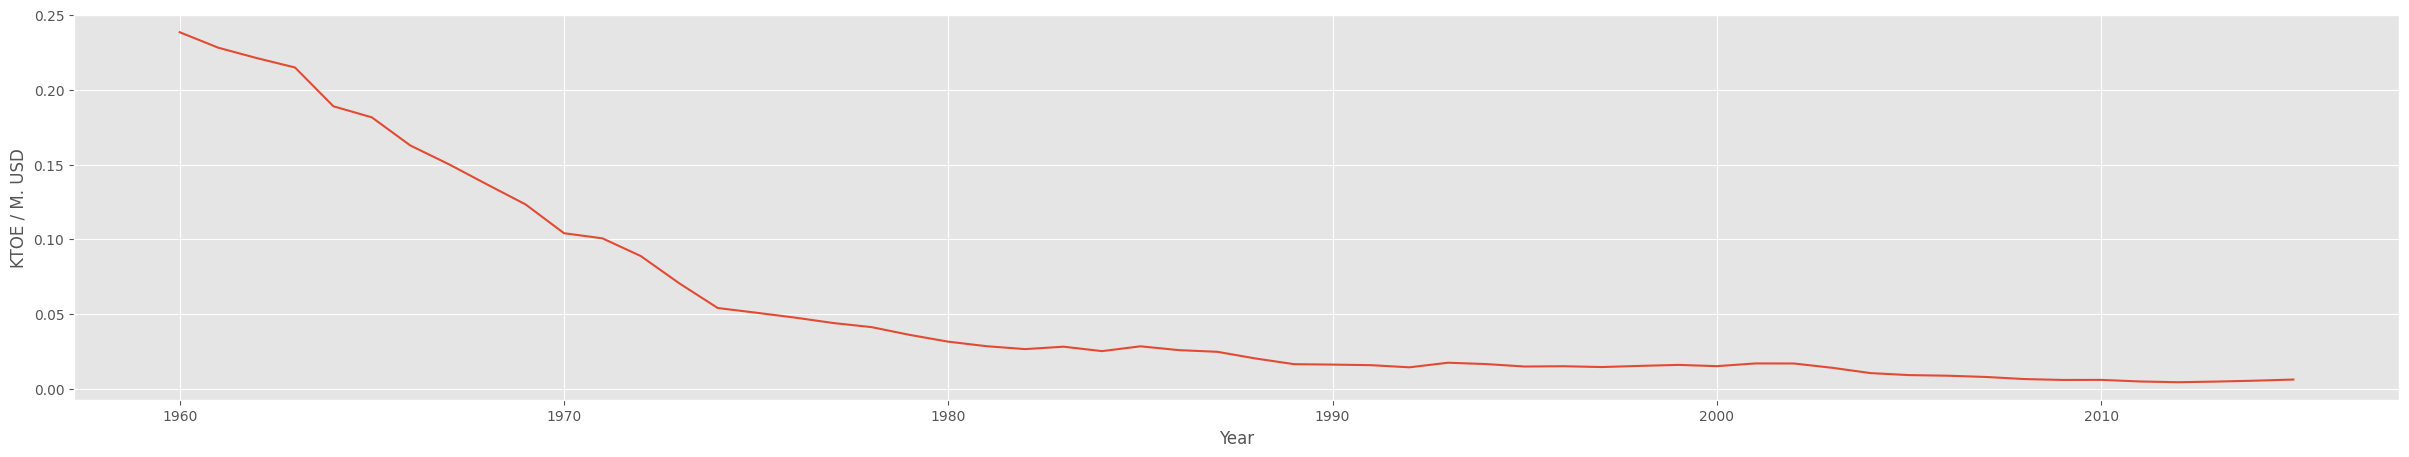

In [ ]:
#Filteting the df
filtered_df = merged_df[merged_df['cntry_code']=='AUS']
filtered_df = filtered_df.sort_values('year')

#Ploting the sum from North America
fig, ax = plt.subplots(figsize=(30,5))
#sn.barplot(data=df_cntry,x=df_cntry.index,y='value',ax=ax, alpha=.5,color='blue')
sn.lineplot(data=filtered_df,x='year',y='corr',ax=ax)
#sn.relplot(x="cntry_code", y="value", hue="cntry_region", size="year",sizes=(20,30), alpha=.5, palette="muted", height=6, data=dfp)


ax.set_xlabel('Year')
ax.set_ylabel('KTOE / M. USD')
plt.show()


In [7]:
def oil_clean():
    
    df = pd.read_csv('..\data\oilprice_data.csv')
    #df = pd.read_csv('.\data\oilprice_data.csv') #For ploting here the charts use this !!!

    #Rename the columns
    df = df.rename(columns={'Date' : 'date','Price':'oil_price'})
    #df = df.reset_index()
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df = df[df['year']<=2015]
    
    df_oil = df[['year','oil_price']]
    df_oil = df_oil.groupby('year').mean()
    df_oil = df_oil.reset_index()
    
    return df_oil

df = oil_clean()
df.tail()

KeyboardInterrupt: 

In [ ]:
oil_price = oil_clean()
ren = renw_clean()


# 1 toe = 11.63 (MWh) = 7.33 (Barrels of oil equivalent)

kto_gwh = 11.63 # 1 Ktoe = 11.63 (GWh) 
kto_bo = 7330 # 1 Ktoe = 7330 (Barrels of oil equivalent) 


ren = ren.rename(columns={'value' : 'value_ktoe'})

ren['value_boe'] = ren['value_ktoe']*kto_bo
ren['value_gwhe'] = ren['value_ktoe']*kto_gwh

#Simplifying the dataframes
ren = ren[['year','cntry_code','cntry_name','cntry_region','value_ktoe','value_gwhe','value_boe']]


main_df = pd.merge(ren,oil_price, on='year', how='inner')

main_df['usd_t'] = main_df['value_boe']*main_df['oil_price'] / 10**9
main_df.head()

,year,cntry_code,cntry_name,cntry_region,value_ktoe,value_gwhe,value_boe,oil_price,usd_t
0,1987,AUS,Australia,Oceania,4700.334,54664.88442,3.445345e+07,18.525813,0.638278
1,1987,AUT,Austria,Europe,5278.122,61384.55886,3.868863e+07,18.525813,0.716738
2,1987,BEL,Belgium,Europe,92.167,1071.90221,6.755841e+05,18.525813,0.012516
3,1987,CAN,Canada,North America,36148.655,420408.85765,2.649696e+08,18.525813,4.908778
4,1987,CZE,CzechRepublic,Europe,211.990,2465.44370,1.553887e+06,18.525813,0.028787
